In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [2]:
# Setting pandas to display columns and rows
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
nfl_data_df = pd.read_csv('NFL Play by Play 2009-2018 (v5).csv')

/Users/tyler/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (42,166,167,168,169,174,175,178,179,182,183,188,189,190,191,194,195,203,204,205,218,219,220,231,232,233,238,240,241,249) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
nfl_data_df.shape

(449371, 255)

In [5]:
nfl_data_df.dtypes

play_id                                   int64
game_id                                   int64
home_team                                object
away_team                                object
posteam                                  object
posteam_type                             object
defteam                                  object
side_of_field                            object
yardline_100                            float64
game_date                                object
quarter_seconds_remaining               float64
half_seconds_remaining                  float64
game_seconds_remaining                  float64
game_half                                object
quarter_end                               int64
drive                                     int64
sp                                        int64
qtr                                       int64
down                                    float64
goal_to_go                              float64
time                                    

In [6]:
nfl_data_df.head()

,play_id,game_id,home_team,away_team,posteam,posteam_type,defteam,side_of_field,yardline_100,game_date,quarter_seconds_remaining,half_seconds_remaining,game_seconds_remaining,game_half,quarter_end,drive,sp,qtr,down,goal_to_go,time,yrdln,ydstogo,ydsnet,desc,play_type,yards_gained,shotgun,no_huddle,qb_dropback,qb_kneel,qb_spike,qb_scramble,pass_length,pass_location,air_yards,yards_after_catch,run_location,run_gap,field_goal_result,kick_distance,extra_point_result,two_point_conv_result,home_timeouts_remaining,away_timeouts_remaining,timeout,timeout_team,td_team,posteam_timeouts_remaining,defteam_timeouts_remaining,total_home_score,total_away_score,posteam_score,defteam_score,score_differential,posteam_score_post,defteam_score_post,score_differential_post,no_score_prob,opp_fg_prob,opp_safety_prob,opp_td_prob,fg_prob,safety_prob,td_prob,extra_point_prob,two_point_conversion_prob,ep,epa,total_home_epa,total_away_epa,total_home_rush_epa,total_away_rush_epa,total_home_pass_epa,total_away_pass_epa,air_epa,yac_epa,comp_air_epa,comp_yac_epa,total_home_comp_air_epa,total_away_comp_air_epa,total_home_comp_yac_epa,total_away_comp_yac_epa,total_home_raw_air_epa,total_away_raw_air_epa,total_home_raw_yac_epa,total_away_raw_yac_epa,wp,def_wp,home_wp,away_wp,wpa,home_wp_post,away_wp_post,total_home_rush_wpa,total_away_rush_wpa,total_home_pass_wpa,total_away_pass_wpa,air_wpa,yac_wpa,comp_air_wpa,comp_yac_wpa,total_home_comp_air_wpa,total_away_comp_air_wpa,total_home_comp_yac_wpa,total_away_comp_yac_wpa,total_home_raw_air_wpa,total_away_raw_air_wpa,total_home_raw_yac_wpa,total_away_raw_yac_wpa,punt_blocked,first_down_rush,first_down_pass,first_down_penalty,third_down_converted,third_down_failed,fourth_down_converted,fourth_down_failed,incomplete_pass,interception,punt_inside_twenty,punt_in_endzone,punt_out_of_bounds,punt_downed,punt_fair_catch,kickoff_inside_twenty,kickoff_in_endzone,kickoff_out_of_bounds,kickoff_downed,kickoff_fair_catch,fumble_forced,fumble_not_forced,fumble_out_of_bounds,solo_tackle,safety,penalty,tackled_for_loss,fumble_lost,own_kickoff_recovery,own_kickoff_recovery_td,qb_hit,rush_attempt,pass_attempt,sack,touchdown,pass_touchdown,rush_touchdown,return_touchdown,extra_point_attempt,two_point_attempt,field_goal_attempt,kickoff_attempt,punt_attempt,fumble,complete_pass,assist_tackle,lateral_reception,lateral_rush,lateral_return,lateral_recovery,passer_player_id,passer_player_name,receiver_player_id,receiver_player_name,rusher_player_id,rusher_player_name,lateral_receiver_player_id,lateral_receiver_player_name,lateral_rusher_player_id,lateral_rusher_player_name,lateral_sack_player_id,lateral_sack_player_name,interception_player_id,interception_player_name,lateral_interception_player_id,lateral_interception_player_name,punt_returner_player_id,punt_returner_player_name,lateral_punt_returner_player_id,lateral_punt_returner_player_name,kickoff_returner_player_name,kickoff_returner_player_id,lateral_kickoff_returner_player_id,lateral_kickoff_returner_player_name,punter_player_id,punter_player_name,kicker_player_name,kicker_player_id,own_kickoff_recovery_player_id,own_kickoff_recovery_player_name,blocked_player_id,blocked_player_name,tackle_for_loss_1_player_id,tackle_for_loss_1_player_name,tackle_for_loss_2_player_id,tackle_for_loss_2_player_name,qb_hit_1_player_id,qb_hit_1_player_name,qb_hit_2_player_id,qb_hit_2_player_name,forced_fumble_player_1_team,forced_fumble_player_1_player_id,forced_fumble_player_1_player_name,forced_fumble_player_2_team,forced_fumble_player_2_player_id,forced_fumble_player_2_player_name,solo_tackle_1_team,solo_tackle_2_team,solo_tackle_1_player_id,solo_tackle_2_player_id,solo_tackle_1_player_name,solo_tackle_2_player_name,assist_tackle_1_player_id,assist_tackle_1_player_name,assist_tackle_1_team,assist_tackle_2_player_id,assist_tackle_2_player_name,assist_tackle_2_team,assist_tackle_3_player_id,assist_tackle_3_player_name,assist_tackle_3_team,assist_tackle_4_player_id,assist_tackle_4_player_name,assist_tackl

In [7]:
# Getting a list of columns in the dataset to allow me to trim down to most important
list(nfl_data_df.columns)

['play_id',
 'game_id',
 'home_team',
 'away_team',
 'posteam',
 'posteam_type',
 'defteam',
 'side_of_field',
 'yardline_100',
 'game_date',
 'quarter_seconds_remaining',
 'half_seconds_remaining',
 'game_seconds_remaining',
 'game_half',
 'quarter_end',
 'drive',
 'sp',
 'qtr',
 'down',
 'goal_to_go',
 'time',
 'yrdln',
 'ydstogo',
 'ydsnet',
 'desc',
 'play_type',
 'yards_gained',
 'shotgun',
 'no_huddle',
 'qb_dropback',
 'qb_kneel',
 'qb_spike',
 'qb_scramble',
 'pass_length',
 'pass_location',
 'air_yards',
 'yards_after_catch',
 'run_location',
 'run_gap',
 'field_goal_result',
 'kick_distance',
 'extra_point_result',
 'two_point_conv_result',
 'home_timeouts_remaining',
 'away_timeouts_remaining',
 'timeout',
 'timeout_team',
 'td_team',
 'posteam_timeouts_remaining',
 'defteam_timeouts_remaining',
 'total_home_score',
 'total_away_score',
 'posteam_score',
 'defteam_score',
 'score_differential',
 'posteam_score_post',
 'defteam_score_post',
 'score_differential_post',
 'no_sc

In [8]:
# Getting smaller set of columns to use for analysis
cols = ['play_id','game_id','game_date','time','quarter_seconds_remaining','half_seconds_remaining',
 'game_seconds_remaining','game_half','quarter_end','qtr','home_team','away_team','posteam','posteam_type',
 'defteam','side_of_field','yardline_100','drive','sp','down','goal_to_go','yrdln','ydstogo','ydsnet',
 'desc','play_type','yards_gained','pass_length','air_yards','yards_after_catch','field_goal_result',
 'kick_distance','extra_point_result','two_point_conv_result','td_team','total_home_score','total_away_score',
 'posteam_score','defteam_score','sack','touchdown','pass_touchdown','rush_touchdown','return_touchdown',
 'extra_point_attempt','two_point_attempt','field_goal_attempt','fumble','complete_pass']

In [9]:
# Creating dataframe with most important columns and only 2017 and 2018
nfl_small = nfl_data_df[nfl_data_df['game_date']>='2017-04-01'][cols].reset_index() #Keeping original index column unless needed later
nfl_small.head(3)

,index,play_id,game_id,game_date,time,quarter_seconds_remaining,half_seconds_remaining,game_seconds_remaining,game_half,quarter_end,qtr,home_team,away_team,posteam,posteam_type,defteam,side_of_field,yardline_100,drive,sp,down,goal_to_go,yrdln,ydstogo,ydsnet,desc,play_type,yards_gained,pass_length,air_yards,yards_after_catch,field_goal_result,kick_distance,extra_point_result,two_point_conv_result,td_team,total_home_score,total_away_score,posteam_score,defteam_score,sack,touchdown,pass_touchdown,rush_touchdown,return_touchdown,extra_point_attempt,two_point_attempt,field_goal_attempt,fumble,complete_pass
0,362094,44,2017090700,2017-09-07,15:00,900.0,1800.0,3600.0,Half1,0,1,NE,KC,NE,home,KC,KC,35.0,1,0,NaN,0.0,KC 35,0,73,C.Santos kicks 64 yards from KC 35 to NE 1. D....,kickoff,0.0,NaN,NaN,NaN,NaN,64.0,NaN,NaN,NaN,0,0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,362095,68,2017090700,2017-09-07,14:55,895.0,1795.0,3595.0,Half1,0,1,NE,KC,NE,home,KC,NE,73.0,1,0,1.0,0.0,NE 27,10,0,(14:55) NE 12-Brady 18th season as Patriots QB...,pass,0.0,deep,27.0,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,362096,94,2017090700,2017-09-07,14:49,889.0,1789.0,3589.0,Half1,0,1,NE,KC,NE,home,KC,NE,73.0,1,0,2.0,0.0,NE 27,10,8,(14:49) T.Brady pass short right to R.Burkhead...,pass,8.0,short,1.0,7.0,NaN,NaN,NaN,NaN,NaN,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


<h2>Data Cleaning</h2>

In [10]:
# Changing date object to date format
nfl_small['game_date'] = pd.to_datetime(nfl_small['game_date'])
nfl_small.head(3)

,index,play_id,game_id,game_date,time,quarter_seconds_remaining,half_seconds_remaining,game_seconds_remaining,game_half,quarter_end,qtr,home_team,away_team,posteam,posteam_type,defteam,side_of_field,yardline_100,drive,sp,down,goal_to_go,yrdln,ydstogo,ydsnet,desc,play_type,yards_gained,pass_length,air_yards,yards_after_catch,field_goal_result,kick_distance,extra_point_result,two_point_conv_result,td_team,total_home_score,total_away_score,posteam_score,defteam_score,sack,touchdown,pass_touchdown,rush_touchdown,return_touchdown,extra_point_attempt,two_point_attempt,field_goal_attempt,fumble,complete_pass
0,362094,44,2017090700,2017-09-07,15:00,900.0,1800.0,3600.0,Half1,0,1,NE,KC,NE,home,KC,KC,35.0,1,0,NaN,0.0,KC 35,0,73,C.Santos kicks 64 yards from KC 35 to NE 1. D....,kickoff,0.0,NaN,NaN,NaN,NaN,64.0,NaN,NaN,NaN,0,0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,362095,68,2017090700,2017-09-07,14:55,895.0,1795.0,3595.0,Half1,0,1,NE,KC,NE,home,KC,NE,73.0,1,0,1.0,0.0,NE 27,10,0,(14:55) NE 12-Brady 18th season as Patriots QB...,pass,0.0,deep,27.0,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,362096,94,2017090700,2017-09-07,14:49,889.0,1789.0,3589.0,Half1,0,1,NE,KC,NE,home,KC,NE,73.0,1,0,2.0,0.0,NE 27,10,8,(14:49) T.Brady pass short right to R.Burkhead...,pass,8.0,short,1.0,7.0,NaN,NaN,NaN,NaN,NaN,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [11]:
# Creating a function that examines missing values in a dataframe easily. This can re-used later.
def null_count_func(dataframe):
    columns = list(dataframe.columns)

    for column in columns:
        total = dataframe[column].count()
        null_cnt = dataframe[column].isnull().sum()
        print('Column {} has {} real values, and {} null values'.format(column,total,null_cnt))

In [12]:
null_count_func(nfl_small)

Column index has 87277 real values, and 0 null values
Column play_id has 87277 real values, and 0 null values
Column game_id has 87277 real values, and 0 null values
Column game_date has 87277 real values, and 0 null values
Column time has 87240 real values, and 37 null values
Column quarter_seconds_remaining has 87240 real values, and 37 null values
Column half_seconds_remaining has 87216 real values, and 61 null values
Column game_seconds_remaining has 87218 real values, and 59 null values
Column game_half has 87277 real values, and 0 null values
Column quarter_end has 87277 real values, and 0 null values
Column qtr has 87277 real values, and 0 null values
Column home_team has 87277 real values, and 0 null values
Column away_team has 87277 real values, and 0 null values
Column posteam has 84286 real values, and 2991 null values
Column posteam_type has 84375 real values, and 2902 null values
Column defteam has 84375 real values, and 2902 null values
Column side_of_field has 87132 real

From the null check funtion, we see quite a few columns with nulls, but I am unsure if that is on purpose or just data gaps.

I plan to explore:   
1. time
2. quarter_seconds_remaining
3. half_seconds_remaining
4. game_seconds_remaining
5. posteam
6. posteam_type
7. defteam
8. yardline_100
9. down
10. goal_to_go
11. play_type
12. pass_length (ensure it's de-duped from runs)
13. air_yards (ensure it's de-duped from runs)
14. yards_after_catch (ensure it's de-duped from runs)
15. posteam_score
16. defteam_score

In [13]:
nfl_small[nfl_small['time'].isnull()]

,index,play_id,game_id,game_date,time,quarter_seconds_remaining,half_seconds_remaining,game_seconds_remaining,game_half,quarter_end,qtr,home_team,away_team,posteam,posteam_type,defteam,side_of_field,yardline_100,drive,sp,down,goal_to_go,yrdln,ydstogo,ydsnet,desc,play_type,yards_gained,pass_length,air_yards,yards_after_catch,field_goal_result,kick_distance,extra_point_result,two_point_conv_result,td_team,total_home_score,total_away_score,posteam_score,defteam_score,sack,touchdown,pass_touchdown,rush_touchdown,return_touchdown,extra_point_attempt,two_point_attempt,field_goal_attempt,fumble,complete_pass
243,362337,1090,2017091000,2017-09-10,NaN,NaN,NaN,NaN,Half1,0,2,BUF,NYJ,NaN,NaN,NaN,NYJ,NaN,5,0,NaN,NaN,NYJ 34,0,77,BLANK PLAY,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2861,364955,2154,2017091700,2017-09-17,NaN,NaN,NaN,NaN,Half1,0,2,BAL,CLE,NaN,NaN,NaN,CLE,NaN,14,0,NaN,NaN,CLE 2,0,40,BLANK PLAY,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4902,366996,815,2017091710,2017-09-17,NaN,NaN,NaN,NaN,Half1,0,1,DEN,DAL,NaN,NaN,NaN,DEN,NaN,5,0,NaN,NaN,DEN 46,0,15,The game has been suspended. Game halted due t...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4903,366997,831,2017091710,2017-09-17,NaN,NaN,NaN,NaN,Half1,0,1,DEN,DAL,NaN,NaN,NaN,NaN,NaN,5,0,NaN,NaN,NaN,0,15,The game has resumed. Game re-started at 3:58 PM,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6429,368523,2528,2017092401,2017-09-24,NaN,NaN,NaN,NaN,Half1,0,2,BUF,DEN,NaN,NaN,NaN,BUF,NaN,13,0,NaN,NaN,BUF 35,0,0,End of half - 2.34 pm,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6519,368613,4662,2017092401,2017-09-24,NaN,NaN,NaN,NaN,Half2,0,4,BUF,DEN,NaN,NaN,NaN,BUF,NaN,24,0,NaN,NaN,BUF 40,0,-4,End of game - 4.05 pm,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8316,370410,1027,2017092800,2017-09-28,NaN,NaN,NaN,NaN,Half1,0,2,GB,CHI,NaN,NaN,NaN,NaN,NaN,8,0,NaN,NaN,NaN,0,11,The game has been suspended. Field cleared tem...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8317,370411,1060,2017092800,2017-09-28,NaN,NaN,NaN,NaN,Half1,0,2,GB,CHI,NaN,NaN,NaN,NaN,NaN,8,0,NaN,NaN,NaN,0,11,The game has resumed.,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11487,373581,3809,2017100801,2017-10-08,NaN,NaN,NaN,NaN,Half2,0,4,CLE,NYJ,NaN,NaN,NaN,NYJ,NaN,20,0,NaN,NaN,NYJ 41,0,86,BLANK PLAY,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12684,374778,2030,2017100806,2017-10-08,NaN,NaN,NaN,NaN,Half1,0,2,PHI,ARI,NaN,NaN,NaN,ARI,NaN,13,0,NaN,NaN,ARI 33,0,47,BLANK PLAY,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
# Most look like stoppage in play. I will try to backfill from previous time
nfl_small[nfl_small['time'].isnull()].groupby('desc')['desc'].count()

desc
BLANK PLAY                                                                                                                                                                                   5
End of game - 11.29 pm                                                                                                                                                                       1
End of game - 3.59 pm                                                                                                                                                                        2
End of game - 4.00 pm                                                                                                                                                                        1
End of game - 4.04 pm                                                                                                                                                                        1
End of game - 4.05 pm                   

In [15]:
# Exploring blank plays, it looks like we can remove the rows from the dataset
nfl_small[(nfl_small['game_id']==2017091000) & (nfl_small['play_id'].between(1062,1102))] 

,index,play_id,game_id,game_date,time,quarter_seconds_remaining,half_seconds_remaining,game_seconds_remaining,game_half,quarter_end,qtr,home_team,away_team,posteam,posteam_type,defteam,side_of_field,yardline_100,drive,sp,down,goal_to_go,yrdln,ydstogo,ydsnet,desc,play_type,yards_gained,pass_length,air_yards,yards_after_catch,field_goal_result,kick_distance,extra_point_result,two_point_conv_result,td_team,total_home_score,total_away_score,posteam_score,defteam_score,sack,touchdown,pass_touchdown,rush_touchdown,return_touchdown,extra_point_attempt,two_point_attempt,field_goal_attempt,fumble,complete_pass
242,362336,1062,2017091000,2017-09-10,13:59,839.0,839.0,2639.0,Half1,0,2,BUF,NYJ,BUF,home,NYJ,NYJ,34.0,5,0,2.0,0.0,NYJ 34,10,77,(13:59) (Shotgun) T.Taylor pass short middle t...,pass,12.0,short,4.0,8.0,NaN,NaN,NaN,NaN,NaN,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
243,362337,1090,2017091000,2017-09-10,NaN,NaN,NaN,NaN,Half1,0,2,BUF,NYJ,NaN,NaN,NaN,NYJ,NaN,5,0,NaN,NaN,NYJ 34,0,77,BLANK PLAY,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
244,362338,1102,2017091000,2017-09-10,13:22,802.0,802.0,2602.0,Half1,0,2,BUF,NYJ,BUF,home,NYJ,NYJ,22.0,5,0,1.0,0.0,NYJ 22,10,71,(13:22) M.Tolbert right tackle to NYJ 8 for 14...,run,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
blank_play_drop = list(nfl_small[nfl_small['desc']=='BLANK PLAY'].index)
blank_play_drop

[243, 2861, 11487, 12684, 26364]

In [17]:
nfl_small.drop(nfl_small.index[blank_play_drop], inplace=True)

In [18]:
list(nfl_small[nfl_small['desc']=='BLANK PLAY'].index)

[]

In [19]:
# Exploring delays, it looks like we will need to account for delay times, but can drop rows after
nfl_small[(nfl_small['game_id']==2017091710) & (nfl_small['play_id'].between(750,850))] 

,index,play_id,game_id,game_date,time,quarter_seconds_remaining,half_seconds_remaining,game_seconds_remaining,game_half,quarter_end,qtr,home_team,away_team,posteam,posteam_type,defteam,side_of_field,yardline_100,drive,sp,down,goal_to_go,yrdln,ydstogo,ydsnet,desc,play_type,yards_gained,pass_length,air_yards,yards_after_catch,field_goal_result,kick_distance,extra_point_result,two_point_conv_result,td_team,total_home_score,total_away_score,posteam_score,defteam_score,sack,touchdown,pass_touchdown,rush_touchdown,return_touchdown,extra_point_attempt,two_point_attempt,field_goal_attempt,fumble,complete_pass
4900,366994,769,2017091710,2017-09-17,01:14,74.0,974.0,2774.0,Half1,0,1,DEN,DAL,DAL,away,DEN,DAL,55.0,5,0,3.0,0.0,DAL 45,4,15,"(1:14) (No Huddle, Shotgun) D.Prescott pass sh...",pass,9.0,short,9.0,0.0,NaN,NaN,NaN,NaN,NaN,7,0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4901,366995,793,2017091710,2017-09-17,00:38,38.0,938.0,2738.0,Half1,0,1,DEN,DAL,DAL,away,DEN,DEN,46.0,5,0,1.0,0.0,DEN 46,10,15,"(:38) (No Huddle, Shotgun) D.Prescott pass inc...",pass,0.0,deep,16.0,NaN,NaN,NaN,NaN,NaN,NaN,7,0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4902,366996,815,2017091710,2017-09-17,NaN,NaN,NaN,NaN,Half1,0,1,DEN,DAL,NaN,NaN,NaN,DEN,NaN,5,0,NaN,NaN,DEN 46,0,15,The game has been suspended. Game halted due t...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4903,366997,831,2017091710,2017-09-17,NaN,NaN,NaN,NaN,Half1,0,1,DEN,DAL,NaN,NaN,NaN,NaN,NaN,5,0,NaN,NaN,NaN,0,15,The game has resumed. Game re-started at 3:58 PM,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4904,366998,850,2017091710,2017-09-17,00:33,33.0,933.0,2733.0,Half1,0,1,DEN,DAL,DAL,away,DEN,DEN,46.0,5,0,2.0,0.0,DEN 46,10,15,(:33) (Shotgun) D.Prescott pass incomplete sho...,pass,0.0,short,-4.0,NaN,NaN,NaN,NaN,NaN,NaN,7,0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
# Exploring end of half/game, it looks like we should also account for time, but can drop rows after
nfl_small[(nfl_small['game_id']==2017092401) & (nfl_small['play_id'].between(2500,2600))]

,index,play_id,game_id,game_date,time,quarter_seconds_remaining,half_seconds_remaining,game_seconds_remaining,game_half,quarter_end,qtr,home_team,away_team,posteam,posteam_type,defteam,side_of_field,yardline_100,drive,sp,down,goal_to_go,yrdln,ydstogo,ydsnet,desc,play_type,yards_gained,pass_length,air_yards,yards_after_catch,field_goal_result,kick_distance,extra_point_result,two_point_conv_result,td_team,total_home_score,total_away_score,posteam_score,defteam_score,sack,touchdown,pass_touchdown,rush_touchdown,return_touchdown,extra_point_attempt,two_point_attempt,field_goal_attempt,fumble,complete_pass
6428,368522,2502,2017092401,2017-09-24,00:01,1.0,1.0,1801.0,Half1,0,2,BUF,DEN,DEN,away,BUF,BUF,35.0,13,0,NaN,0.0,BUF 35,0,0,S.Hauschka kicks 14 yards from BUF 35 to BUF 4...,kickoff,0.0,NaN,NaN,NaN,NaN,14.0,NaN,NaN,NaN,13,13,13.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6429,368523,2528,2017092401,2017-09-24,NaN,NaN,NaN,NaN,Half1,0,2,BUF,DEN,NaN,NaN,NaN,BUF,NaN,13,0,NaN,NaN,BUF 35,0,0,End of half - 2.34 pm,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6430,368524,2544,2017092401,2017-09-24,00:00,0.0,0.0,1800.0,Half1,1,2,BUF,DEN,NaN,NaN,NaN,NaN,NaN,13,0,NaN,NaN,NaN,0,0,END QUARTER 2,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6431,368525,2561,2017092401,2017-09-24,15:00,900.0,1800.0,1800.0,Half2,0,3,BUF,DEN,BUF,home,DEN,DEN,35.0,14,0,NaN,0.0,DEN 35,0,0,B.McManus kicks 61 yards from DEN 35 to BUF 4....,kickoff,0.0,NaN,NaN,NaN,NaN,61.0,NaN,NaN,NaN,13,13,13.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6432,368526,2583,2017092401,2017-09-24,14:54,894.0,1794.0,1794.0,Half2,0,3,BUF,DEN,BUF,home,DEN,BUF,78.0,14,0,1.0,0.0,BUF 22,10,-2,(14:54) T.Taylor sacked at BUF 20 for -2 yards...,pass,-2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,13,13.0,13.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<h2> Adding Time: We must add a column that is directly or approximates time of day, so we are able to join with our weather data</h2>

In [21]:
# Need team names to create time DF
# list(nfl_small['home_team'].unique())

In [22]:
def game_schedule(year):
    
    import requests
    import urllib.request
    import time
    import pandas as pd
    
    url = 'https://www.pro-football-reference.com/years/' + year + '/games.htm'
    
    df = pd.read_html(url)[0]
    
    # Renaming column that determine location of game
    df = df.rename(columns={"Unnamed: 5": "location"})
    
    df['year'] = year
    
    df['home_team'] = df.apply(lambda x : x['Loser/tie'] if x['location'] == '@' else x['Winner/tie'],axis=1)
    df['away_team'] = df.apply(lambda x : x['Winner/tie'] if x['location'] == '@' else x['Loser/tie'],axis=1)
    
    team_mapping = {
    'Arizona Cardinals':'ARI',
    'Atlanta Falcons':'ATL',
    'Baltimore Ravens':'BAL',
    'Buffalo Bills':'BUF',
    'Carolina Panthers':'CAR',
    'Chicago Bears':'CHI',
    'Cincinnati Bengals':'CIN',
    'Cleveland Browns':'CLE',
    'Dallas Cowboys':'DAL',
    'Denver Broncos':'DEN',
    'Detroit Lions':'DET',
    'Green Bay Packers':'GB',
    'Houston Texans':'HOU',
    'Indianapolis Colts':'IND',
    'Jacksonville Jaguars':'JAX',
    'Kansas City Chiefs':'KC',
    'Los Angeles Rams':'LA',
    'Los Angeles Chargers':'LAC',
    'Miami Dolphins':'MIA',
    'Minnesota Vikings':'MIN',
    'New England Patriots':'NE',
    'New Orleans Saints':'NO',
    'New York Giants':'NYG',
    'New York Jets':'NYJ',
    'Oakland Raiders':'OAK',
    'Philadelphia Eagles':'PHI',
    'Pittsburgh Steelers':'PIT',
    'Seattle Seahawks':'SEA',
    'San Francisco 49ers':'SF',
    'Tampa Bay Buccaneers':'TB',
    'Tennessee Titans':'TEN',
    'Washington Redskins':'WAS'
    }
    
    # Replacing team names to be consistent with play-by-play data
    df = df.replace({'home_team':team_mapping}).replace({'away_team':team_mapping})
    
    # Removing date headers
    df = df[~df['Date'].isin(['Date','Playoffs'])]
    
    # Casting date object as date
    df['Date'] = pd.to_datetime(df['Date'] + ', ' + year)
    
    # Casting Time object as time
    df['Time'] = pd.to_datetime(df['Time']).dt.time
    
    return df[['Date','Time','home_team','away_team']]

In [23]:
schd_17 = game_schedule('2017')
schd_17.head(4)

,Date,Time,home_team,away_team
0,2017-09-07,20:30:00,NE,KC
1,2017-09-10,13:00:00,TEN,OAK
2,2017-09-10,13:00:00,CHI,ATL
3,2017-09-10,13:00:00,BUF,NYJ


In [27]:
# Adding join values to add time to kickoff
schd_17['qtr'] = 1
schd_17['play_type'] = 'kickoff'
schd_17['time'] = '15:00'
schd_17.head(3)

,Date,Time,home_team,away_team,qtr,play_type,time
0,2017-09-07,20:30:00,NE,KC,1,kickoff,15:00
1,2017-09-10,13:00:00,TEN,OAK,1,kickoff,15:00
2,2017-09-10,13:00:00,CHI,ATL,1,kickoff,15:00


In [ ]:
pd.merge(nfl_small,schd_17, how = 'left', left_on = ['game_date','home_team','away_team','qtr','play_type','time'],\
                                        right_on = ['Date','home_team','away_team','qtr','play_type','time'])

In [ ]:
nfl_small.head(10)

In [24]:
nfl_small.where(nfl_small['qtr'] == 1)#\
#                 and nfl_small['time'] == '15:00'\
#                 and nfl_small['play_type'] == 'kickoff')

KeyboardInterrupt: 

<h2>Individual Game Exploration</h2>

In [14]:
# Getting data from one game to explore further
ten_pit_game = nfl_small[nfl_small['game_id']==2009091000].sort_values(by='play_id',ascending=True)

In [15]:
ten_pit_game.head()

,play_id,game_id,game_date,time,quarter_seconds_remaining,half_seconds_remaining,game_seconds_remaining,game_half,quarter_end,qtr,home_team,away_team,posteam,posteam_type,defteam,side_of_field,yardline_100,drive,sp,down,goal_to_go,yrdln,ydstogo,ydsnet,desc,play_type,yards_gained,pass_length,air_yards,yards_after_catch,field_goal_result,kick_distance,extra_point_result,two_point_conv_result,td_team,total_home_score,total_away_score,posteam_score,defteam_score,sack,touchdown,pass_touchdown,rush_touchdown,return_touchdown,extra_point_attempt,two_point_attempt,field_goal_attempt,fumble,complete_pass


In [16]:
ten_pit_game.shape

(0, 49)

In [17]:
# It looks like games don't have consecutive play_ids
nfl_small[(nfl_small['play_id']==47) & (nfl_small['game_id'] == 2009091000)]

,play_id,game_id,game_date,time,quarter_seconds_remaining,half_seconds_remaining,game_seconds_remaining,game_half,quarter_end,qtr,home_team,away_team,posteam,posteam_type,defteam,side_of_field,yardline_100,drive,sp,down,goal_to_go,yrdln,ydstogo,ydsnet,desc,play_type,yards_gained,pass_length,air_yards,yards_after_catch,field_goal_result,kick_distance,extra_point_result,two_point_conv_result,td_team,total_home_score,total_away_score,posteam_score,defteam_score,sack,touchdown,pass_touchdown,rush_touchdown,return_touchdown,extra_point_attempt,two_point_attempt,field_goal_attempt,fumble,complete_pass


In [18]:
# Creating end of drive column to easily sum data

for i in range(0, len(ten_pit_game)-1):
    ten_pit_game.loc[i,'end_of_drive'] = ten_pit_game.loc[i+1,'drive'] - ten_pit_game.loc[i,'drive']

# Adding one more for last drive of game
ten_pit_game.loc[len(ten_pit_game)-1,'end_of_drive'] = 1

In [19]:
# Ensuring end of drive column is created correctly
ten_pit_game.head(10)

,play_id,game_id,game_date,time,quarter_seconds_remaining,half_seconds_remaining,game_seconds_remaining,game_half,quarter_end,qtr,home_team,away_team,posteam,posteam_type,defteam,side_of_field,yardline_100,drive,sp,down,goal_to_go,yrdln,ydstogo,ydsnet,desc,play_type,yards_gained,pass_length,air_yards,yards_after_catch,field_goal_result,kick_distance,extra_point_result,two_point_conv_result,td_team,total_home_score,total_away_score,posteam_score,defteam_score,sack,touchdown,pass_touchdown,rush_touchdown,return_touchdown,extra_point_attempt,two_point_attempt,field_goal_attempt,fumble,complete_pass,end_of_drive
-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [197]:
# Pulling end of drive rows only
ten_pit_game[ten_pit_game['end_of_drive'] == 1]

,play_id,game_id,game_date,time,quarter_seconds_remaining,half_seconds_remaining,game_seconds_remaining,game_half,quarter_end,qtr,home_team,away_team,posteam,posteam_type,defteam,side_of_field,yardline_100,drive,sp,down,goal_to_go,yrdln,ydstogo,ydsnet,desc,play_type,yards_gained,pass_length,air_yards,yards_after_catch,field_goal_result,kick_distance,extra_point_result,two_point_conv_result,td_team,total_home_score,total_away_score,posteam_score,defteam_score,sack,touchdown,pass_touchdown,rush_touchdown,return_touchdown,extra_point_attempt,two_point_attempt,field_goal_attempt,fumble,complete_pass,end_of_drive
4,139,2009091000,2009-09-10,13:27,807.0,1707.0,3507.0,Half1,0,1,PIT,TEN,PIT,home,TEN,PIT,56.0,1,0,4.0,0.0,PIT 44,8,2,(13:27) (Punt formation) D.Sepulveda punts 54 ...,punt,0.0,NaN,NaN,NaN,NaN,54.0,NaN,NaN,NaN,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
8,228,2009091000,2009-09-10,11:34,694.0,1594.0,3394.0,Half1,0,1,PIT,TEN,TEN,away,PIT,TEN,96.0,2,0,4.0,0.0,TEN 4,8,2,(11:34) (Punt formation) C.Hentrich punts 50 y...,punt,0.0,NaN,NaN,NaN,NaN,50.0,NaN,NaN,NaN,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
14,365,2009091000,2009-09-10,08:25,505.0,1405.0,3205.0,Half1,0,1,PIT,TEN,PIT,home,TEN,TEN,41.0,3,0,4.0,0.0,TEN 41,21,2,(8:25) (Punt formation) D.Sepulveda punts 30 y...,punt,0.0,NaN,NaN,NaN,NaN,30.0,NaN,NaN,NaN,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
20,522,2009091000,2009-09-10,06:48,408.0,1308.0,3108.0,Half1,0,1,PIT,TEN,TEN,away,PIT,PIT,19.0,4,0,4.0,0.0,PIT 19,7,70,(6:48) (Field Goal formation) R.Bironas 37 yar...,field_goal,0.0,NaN,NaN,NaN,missed,37.0,NaN,NaN,NaN,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
24,603,2009091000,2009-09-10,05:02,302.0,1202.0,3002.0,Half1,0,1,PIT,TEN,PIT,home,TEN,PIT,79.0,5,0,4.0,0.0,PIT 21,16,-6,(5:02) (Punt formation) D.Sepulveda punts 53 y...,punt,0.0,NaN,NaN,NaN,NaN,53.0,NaN,NaN,NaN,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
31,774,2009091000,2009-09-10,01:51,111.0,1011.0,2811.0,Half1,0,1,PIT,TEN,TEN,away,PIT,PIT,44.0,6,0,2.0,0.0,PIT 44,5,30,(1:51) K.Collins pass deep left intended for K...,pass,0.0,deep,39.0,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
34,842,2009091000,2009-09-10,00:12,12.0,912.0,2712.0,Half1,0,1,PIT,TEN,PIT,home,TEN,PIT,76.0,7,0,3.0,0.0,PIT 24,7,3,(:12) (Shotgun) B.Roethlisberger pass deep rig...,pass,0.0,deep,20.0,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
41,998,2009091000,2009-09-10,13:13,793.0,793.0,2593.0,Half1,0,2,PIT,TEN,TEN,away,PIT,PIT,44.0,8,0,4.0,0.0,PIT 44,22,0,(13:13) (Punt formation) C.Hentrich punts 39 y...,punt,0.0,NaN,NaN,NaN,NaN,39.0,NaN,NaN,NaN,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
52,1279,2009091000,2009-09-10,07:25,445.0,445.0,2245.0,Half1,0,2,PIT,TEN,PIT,home,TEN,PIT,62.0,9,0,4.0,0.0,PIT 38,5,33,(7:25) (Punt formation) D.Sepulveda punts 46 y...,punt,0.0,NaN,NaN,NaN,NaN,46.0,NaN,NaN,NaN,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
65,1633,2009091000,2009-09-10,02:22,142.0,142.0,1942.0,Half1,0,2,PIT,TEN,TEN,away,PIT,PIT,13.0,10,0,4.0,0.0,PIT 13,6,60,(2:22) (Field Goal formation) R.Bironas 31 yar...,field_goal,0.0,NaN,NaN,NaN,blocked,31.0,NaN,NaN,NaN,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [200]:
# There appears to be something wrong with yardage data for TEN
# https://www.espn.com/nfl/playbyplay?gameId=290910023
ten_pit_game[(ten_pit_game['end_of_drive'] == 1)&(ten_pit_game['game_half'] == 'Half1')]\
                                            .groupby('posteam').agg({'ydsnet':np.sum})

,ydsnet
posteam,
PIT,131
TEN,233


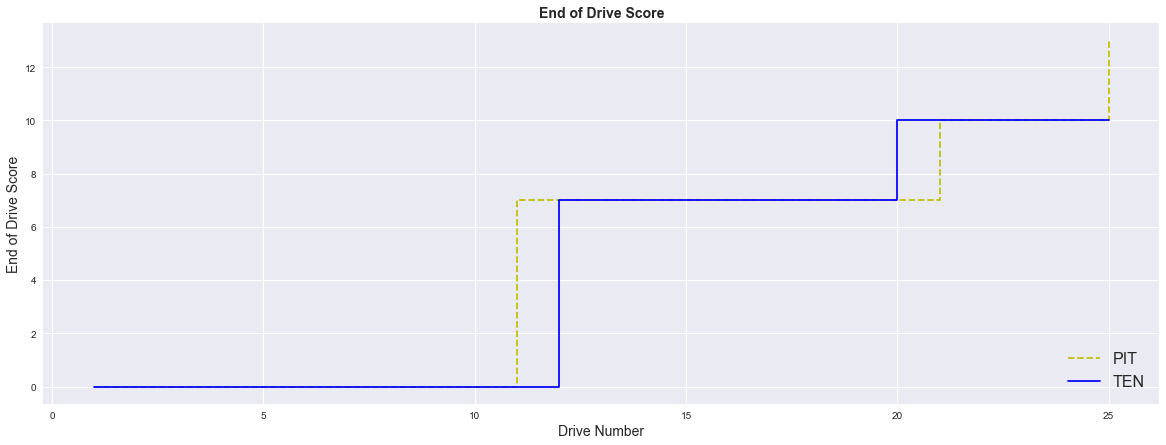

In [181]:
# Reset Fig
plt.close('all')
plt.style.use('seaborn')
fig, ax1 = plt.subplots(figsize=(20,7))
# plt.gca().invert_xaxis()

line1 = ax1.plot(ten_pit_game['drive'],ten_pit_game['total_home_score'],'y--',label='PIT')
line2 = ax1.plot(ten_pit_game['drive'],ten_pit_game['total_away_score'],'b-',label='TEN')

ax1.set_xlabel('Drive Number',fontsize=14)
ax1.set_ylabel('End of Drive Score',fontsize=14)
ax1.set_title("End of Drive Score",fontsize=14,fontweight='bold')

ax1.legend(loc=4,fontsize=16)

plt.show()